In [153]:
mooc_survey=pd.read_csv("Usability_Testing_of_MOOC_system (1).csv")
elf_survey = pd.read_csv("Usability_Testing_of_KU_elf_system_elf_ku_edu_np_ (1).csv")
tam_survey = pd.read_csv("Technology_Acceptance_Model_TAM_.csv")
grade_df = pd.read_csv("grade_sorted.csv")

In [154]:
mooc_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 19 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Response                                                                        109 non-null    int64  
 1   Submitted on:                                                                   109 non-null    object 
 2   Institution                                                                     9 non-null      object 
 3   Department                                                                      10 non-null     object 
 4   Course                                                                          109 non-null    object 
 5   Group                                                                           0 non-null      float64
 6   ID                

In [155]:
grade_df = grade_df[["Name","Class"]]

In [156]:
grade_df.rename(columns = {"Name":"Full name"}, inplace=True)

In [157]:
def class_to_num(x):
    if x=='Poor':return 1
    if x=='Below Average':return 2
    if x=='Average':return 3
    if x=='Above Average':return 4
    if x=='Excellent':return 5

grade_df['Class'].iloc[:]=grade_df['Class'].iloc[:].apply(class_to_num)

grade_df.head()

/tmp/ipykernel_2258/2395290679.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grade_df['Class'].iloc[:]=grade_df['Class'].iloc[:].apply(class_to_num)


,Full name,Class
0,Amrit Acharya,4
1,Suyog Acharya,2
2,Ashish Adhikari,5
3,Namit Adhikari,5
4,Abhinav Arya,2


In [158]:
mooc_survey=mooc_survey.drop(mooc_survey.columns[[0,1,2,3,4,5,8]],axis=1)
# mooc_survey.head()

index=2
for i in range(index,len(mooc_survey.columns)):
    mooc_survey.columns.values[i]=f"Q{i-1}"

mooc_survey.head()


,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,148,Rikesh Karmacharya,3,1,4,1,3,3,4,2,3,1
1,442,Bibhusan Baral,4,3,4,3,3,4,4,3,2,4
2,473,Satyam Karki,4,2,4,3,3,2,5,3,4,3
3,478,Shubh Raj Dhital,5,2,5,1,4,3,5,3,5,2
4,525,Roshan Shreesh,4,2,3,1,4,2,4,1,4,1


In [159]:
inversion=[2,4,6,8,10]

def invert_score(x):
    if x==1:return 5
    if x==2:return 4
    if x==3:return 3
    if x==4:return 2
    if x==5:return 1

for i in inversion :
    mooc_survey.iloc[:,i+1]=mooc_survey.iloc[:,i+1].apply(invert_score)

mooc_survey.head()

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,148,Rikesh Karmacharya,3,5,4,5,3,3,4,4,3,5
1,442,Bibhusan Baral,4,3,4,3,3,2,4,3,2,2
2,473,Satyam Karki,4,4,4,3,3,4,5,3,4,3
3,478,Shubh Raj Dhital,5,4,5,5,4,3,5,3,5,4
4,525,Roshan Shreesh,4,4,3,5,4,4,4,5,4,5


In [160]:
mooc_survey["score"]=mooc_survey.iloc[:,2:11].mean(axis=1)
mooc_survey["round"]=mooc_survey["score"].apply(lambda x: round(x))
mooc_survey.head()

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,score,round
0,148,Rikesh Karmacharya,3,5,4,5,3,3,4,4,3,5,3.777778,4
1,442,Bibhusan Baral,4,3,4,3,3,2,4,3,2,2,3.111111,3
2,473,Satyam Karki,4,4,4,3,3,4,5,3,4,3,3.777778,4
3,478,Shubh Raj Dhital,5,4,5,5,4,3,5,3,5,4,4.333333,4
4,525,Roshan Shreesh,4,4,3,5,4,4,4,5,4,5,4.111111,4


<Axes: >

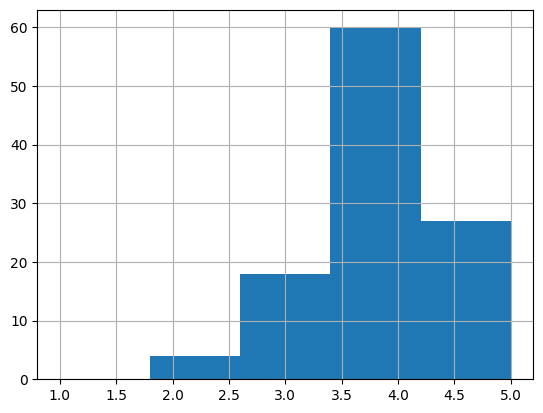

In [161]:
# mooc_survey["score"].hist(bins=10,title="Adaptability Score Distribution ",xlabel="Adaptability score",ylabel="frequency")
import matplotlib as plt
import seaborn as sns

mooc_survey["score"].hist(bins=5,range=(1,5))




<Axes: xlabel='score', ylabel='Density'>

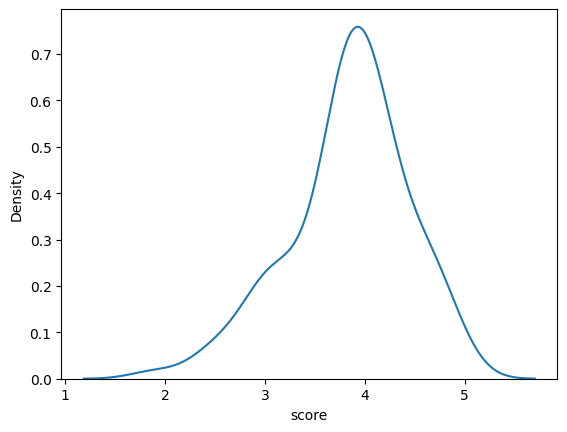

In [162]:
sns.kdeplot(mooc_survey['score'],label="Density")

In [163]:
elf_survey.head()

,Response,Submitted on:,Institution,Department,Course,Group,ID,Full name,Username,"Q01_1->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q02_2->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q03_3->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q04_4->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q05_5->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q06_6->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q07_7->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q08_8->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q09_9->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q10_10->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree"
0,746,24/07/2020 13:49:12,NaN,NaN,COMP 341: Human Computer Interaction,NaN,148,Rikesh Karmacharya,aslan,3,3,2,1,4,2,3,2,3,1
1,875,15/08/2020 17:33:37,NaN,NaN,COMP 341: Human Computer Interaction,NaN,442,Bibhusan Baral,bibhusan,4,3,4,2,4,4,4,3,2,2
2,848,7/8/2020 8:34,NaN,NaN,COMP 341: Human Computer Interaction,NaN,473,Satyam Karki,blackhammer,4,2,4,2,4,2,4,3,4,2
3,849,7/8/2020 11:50,NaN,NaN,COMP 341: Human Computer Interaction,NaN,478,Shubh Raj Dhital,shubh,5,2,5,1,5,2,4,2,5,2
4,779,24/07/2020 13:51:18,NaN,NaN,COMP 341: Human Computer Interaction,NaN,525,Roshan Shreesh,shreesh.rosan,3,1,4,1,4,4,3,1,4,2


In [164]:
elf_survey=elf_survey.drop(elf_survey.columns[[0,1,2,3,4,5,8]],axis=1)
# elf_survey.head()

index=2
for i in range(index,len(elf_survey.columns)):
    elf_survey.columns.values[i]=f"Q{i-1}"

elf_survey.head()


,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,148,Rikesh Karmacharya,3,3,2,1,4,2,3,2,3,1
1,442,Bibhusan Baral,4,3,4,2,4,4,4,3,2,2
2,473,Satyam Karki,4,2,4,2,4,2,4,3,4,2
3,478,Shubh Raj Dhital,5,2,5,1,5,2,4,2,5,2
4,525,Roshan Shreesh,3,1,4,1,4,4,3,1,4,2


In [165]:
inversion=[2,4,6,8,10]

def invert_score(x):
    if x==1:return 5
    if x==2:return 4
    if x==3:return 3
    if x==4:return 2
    if x==5:return 1

for i in inversion :
    elf_survey.iloc[:,i+1]=elf_survey.iloc[:,i+1].apply(invert_score)

elf_survey.head()

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,148,Rikesh Karmacharya,3,3,2,5,4,4,3,4,3,5
1,442,Bibhusan Baral,4,3,4,4,4,2,4,3,2,4
2,473,Satyam Karki,4,4,4,4,4,4,4,3,4,4
3,478,Shubh Raj Dhital,5,4,5,5,5,4,4,4,5,4
4,525,Roshan Shreesh,3,5,4,5,4,2,3,5,4,4


In [166]:
elf_survey["score"]=elf_survey.iloc[:,2:11].mean(axis=1)
elf_survey["round"]=elf_survey["score"].apply(lambda x: round(x))
elf_survey.head()

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,score,round
0,148,Rikesh Karmacharya,3,3,2,5,4,4,3,4,3,5,3.444444,3
1,442,Bibhusan Baral,4,3,4,4,4,2,4,3,2,4,3.333333,3
2,473,Satyam Karki,4,4,4,4,4,4,4,3,4,4,3.888889,4
3,478,Shubh Raj Dhital,5,4,5,5,5,4,4,4,5,4,4.555556,5
4,525,Roshan Shreesh,3,5,4,5,4,2,3,5,4,4,3.888889,4


<Axes: xlabel='score', ylabel='Density'>

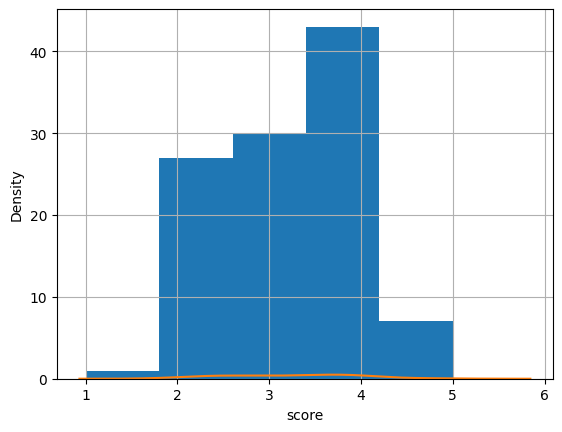

In [167]:
elf_survey["score"].hist(bins=5,range=(1,5))
sns.kdeplot(elf_survey['score'],label="Density")


<Axes: xlabel='score', ylabel='Density'>

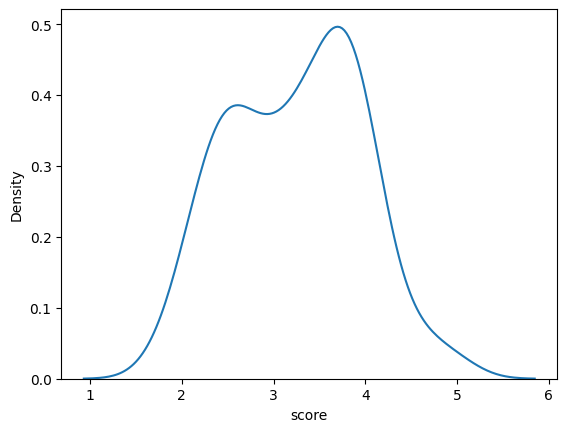

In [168]:
sns.kdeplot(elf_survey['score'],label="Density")

In [169]:
tam_survey.head()

,Response,Submitted on:,Institution,Department,Course,Group,ID,Full name,Username,"Q01_1->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree",...,"Q18_18->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q19_19->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q20_20->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q21_21->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q22_22->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q23_23->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q24_24->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q25_25->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q26_26->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree","Q27_27->1-strongly disagree, 2- disagree, 3-neutral, 4-agree, 5-strongly agree"
0,978,4/9/2020 17:53,NaN,NaN,COMP 341: Human Computer Interaction,NaN,148,Rikesh Karmacharya,aslan,5,...,3,4,3,4,4,4,2,4,4,1
1,977,4/9/2020 17:32,NaN,NaN,COMP 341: Human Computer Interaction,NaN,442,Bibhusan Baral,bibhusan,4,...,4,4,4,5,4,4,2,4,4,2
2,930,4/9/2020 12:42,NaN,NaN,COMP 341: Human Computer Interaction,NaN,473,Satyam Karki,blackhammer,4,...,3,4,2,3,4,3,1,3,4,1
3,964,4/9/2020 12:48,NaN,NaN,COMP 341: Human Computer Interaction,NaN,478,Shubh Raj Dhital,shubh,4,...,4,5,4,4,4,4,2,4,4,1
4,969,4/9/2020 12:49,NaN,NaN,COMP 341: Human Computer Interaction,NaN,525,Roshan Shreesh,shreesh.rosan,4,...,3,3,2,3,4,3,1,3,4,1


In [170]:
tam_survey=tam_survey.drop(tam_survey.columns[[0,1,2,3,4,5,8]],axis=1)
# tam_survey.head()

index=2
for i in range(index,len(tam_survey.columns)):
    tam_survey.columns.values[i]=f"Q{i-1}"

tam_survey.head()


,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,148,Rikesh Karmacharya,5,5,5,5,5,4,3,4,...,3,4,3,4,4,4,2,4,4,1
1,442,Bibhusan Baral,4,3,2,4,4,4,4,4,...,4,4,4,5,4,4,2,4,4,2
2,473,Satyam Karki,4,2,4,4,3,4,4,3,...,3,4,2,3,4,3,1,3,4,1
3,478,Shubh Raj Dhital,4,5,5,5,4,4,4,4,...,4,5,4,4,4,4,2,4,4,1
4,525,Roshan Shreesh,4,3,4,4,2,3,4,4,...,3,3,2,3,4,3,1,3,4,1


In [171]:
inversion=[24, 27]

def invert_score(x):
    if x==1:return 5
    if x==2:return 4
    if x==3:return 3
    if x==4:return 2
    if x==5:return 1

for i in inversion :
    tam_survey.iloc[:,i+1]=tam_survey.iloc[:,i+1].apply(invert_score)

tam_survey.head()

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,148,Rikesh Karmacharya,5,5,5,5,5,4,3,4,...,3,4,3,4,4,4,4,4,4,5
1,442,Bibhusan Baral,4,3,2,4,4,4,4,4,...,4,4,4,5,4,4,4,4,4,4
2,473,Satyam Karki,4,2,4,4,3,4,4,3,...,3,4,2,3,4,3,5,3,4,5
3,478,Shubh Raj Dhital,4,5,5,5,4,4,4,4,...,4,5,4,4,4,4,4,4,4,5
4,525,Roshan Shreesh,4,3,4,4,2,3,4,4,...,3,3,2,3,4,3,5,3,4,5


In [172]:
tam_survey["score"]=tam_survey.iloc[:,2:11].mean(axis=1)
tam_survey["round"]=tam_survey["score"].apply(lambda x: round(x))
tam_survey.head()

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,score,round
0,148,Rikesh Karmacharya,5,5,5,5,5,4,3,4,...,3,4,4,4,4,4,4,5,4.333333,4
1,442,Bibhusan Baral,4,3,2,4,4,4,4,4,...,4,5,4,4,4,4,4,4,3.666667,4
2,473,Satyam Karki,4,2,4,4,3,4,4,3,...,2,3,4,3,5,3,4,5,3.666667,4
3,478,Shubh Raj Dhital,4,5,5,5,4,4,4,4,...,4,4,4,4,4,4,4,5,4.444444,4
4,525,Roshan Shreesh,4,3,4,4,2,3,4,4,...,2,3,4,3,5,3,4,5,3.555556,4


<Axes: >

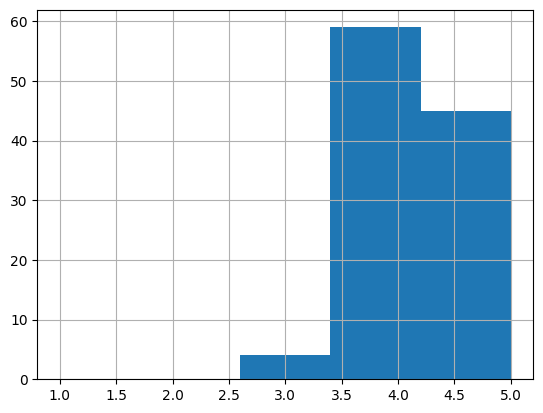

In [173]:
tam_survey["score"].hist(bins=5,range=(1,5))

<Axes: xlabel='score', ylabel='Density'>

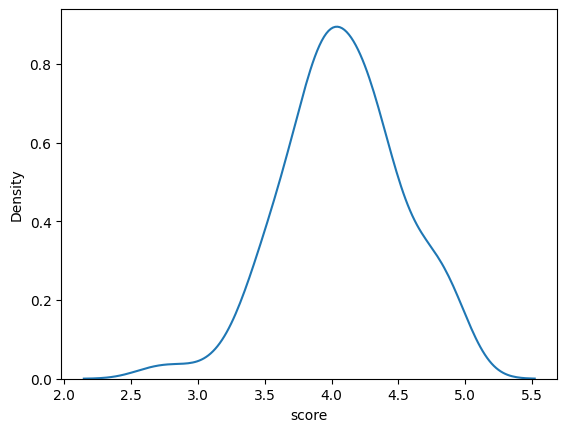

In [174]:
sns.kdeplot(tam_survey['score'],label="Density")

In [175]:
# Count the frequency of each score
score_counts_mooc = Counter(mooc_survey['round'])

# Total number of students
total_students = len(mooc_survey)

# Calculate the probability of each score
probabilities_mooc = {score: count / total_students for score, count in score_counts_mooc.items()}


In [176]:
score_counts_mooc

Counter({4: 69, 3: 23, 5: 14, 2: 3})

In [177]:
probabilities_mooc

{4: 0.6330275229357798,
 3: 0.21100917431192662,
 5: 0.12844036697247707,
 2: 0.027522935779816515}

In [178]:
mooc_survey = pd.merge(mooc_survey, grade_df, on="Full name")

In [179]:
elf_survey = pd.merge(elf_survey, grade_df, on="Full name")

In [180]:
mooc_survey['Class'] = mooc_survey['Class'].astype(int)

In [181]:
grade_df

,Full name,Class
0,Amrit Acharya,4
1,Suyog Acharya,2
2,Ashish Adhikari,5
3,Namit Adhikari,5
4,Abhinav Arya,2
...,...,...
103,Gaurav Thagunna,4
104,Pramod Thapa,1
105,Bimal Timilsina,1
106,Aadil Tuladhar,3


In [182]:
elf_survey

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,score,round,Class
0,148,Rikesh Karmacharya,3,3,2,5,4,4,3,4,3,5,3.444444,3,3
1,442,Bibhusan Baral,4,3,4,4,4,2,4,3,2,4,3.333333,3,1
2,473,Satyam Karki,4,4,4,4,4,4,4,3,4,4,3.888889,4,4
3,478,Shubh Raj Dhital,5,4,5,5,5,4,4,4,5,4,4.555556,5,1
4,525,Roshan Shreesh,3,5,4,5,4,2,3,5,4,4,3.888889,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2255,Minusha Gurung,4,4,4,4,3,4,2,4,3,3,3.555556,4,3
104,2256,Pratik Khadka,3,4,4,4,3,4,4,4,4,4,3.777778,4,2
105,2257,Niraj Tamang,5,2,4,4,2,2,3,2,3,3,3.000000,3,2
106,2258,Bishal Shah,1,3,3,4,2,3,2,2,2,4,2.444444,2,4


In [183]:
tam_survey = pd.merge(tam_survey, grade_df, on="Full name")

In [184]:
tam_survey

,ID,Full name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,score,round,Class
0,148,Rikesh Karmacharya,5,5,5,5,5,4,3,4,...,4,4,4,4,4,4,5,4.333333,4,3
1,442,Bibhusan Baral,4,3,2,4,4,4,4,4,...,5,4,4,4,4,4,4,3.666667,4,1
2,473,Satyam Karki,4,2,4,4,3,4,4,3,...,3,4,3,5,3,4,5,3.666667,4,4
3,478,Shubh Raj Dhital,4,5,5,5,4,4,4,4,...,4,4,4,4,4,4,5,4.444444,4,1
4,525,Roshan Shreesh,4,3,4,4,2,3,4,4,...,3,4,3,5,3,4,5,3.555556,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2255,Minusha Gurung,4,3,4,4,4,4,4,4,...,4,4,4,4,4,4,5,4.000000,4,3
104,2256,Pratik Khadka,4,4,4,4,5,4,4,3,...,4,3,3,4,4,4,5,3.888889,4,2
105,2257,Niraj Tamang,3,3,4,4,4,3,3,4,...,4,4,3,5,3,3,5,3.666667,4,2
106,2258,Bishal Shah,4,3,3,4,4,4,2,3,...,4,3,3,4,4,4,4,3.444444,3,4


## Total Probability Law

In [185]:
class_probabilities = {
    5: .2,
    4: .2,
    3: .2,
    2: .2,
    1: .2
}

## Probability of event that a student being in  excellent grade category given that s/he has rated 5 in mooc survey

In [186]:
probabilities_mooc

{4: 0.6330275229357798,
 3: 0.21100917431192662,
 5: 0.12844036697247707,
 2: 0.027522935779816515}

In [187]:
counter1 = 0
counter2 = 0
round_val = 4
class_val = 5

counter1 = ((mooc_survey['round'] == round_val) & (mooc_survey['Class'] == class_val)).sum()
counter2 = (mooc_survey['Class'] == class_val).sum()


In [188]:
pro_ex_given_rating_mooc = (counter1/counter2)*class_probabilities[class_val]/probabilities_mooc[round_val]

In [189]:
pro_ex_given_rating_mooc

0.21541501976284583

## Probability of event that a student being in excellent grade category given that s/he has rated 5 in elf survey

In [190]:
# Count the frequency of each score
score_counts_elf = Counter(elf_survey['round'])

# Total number of students
total_students = len(elf_survey)

# Calculate the probability of each score
probabilities_elf = {score: count / total_students for score, count in score_counts_elf.items()}


In [191]:
score_counts_elf

Counter({3: 42, 4: 41, 2: 20, 5: 5})

In [192]:
probabilities_elf

{3: 0.3888888888888889,
 4: 0.37962962962962965,
 5: 0.046296296296296294,
 2: 0.18518518518518517}

In [193]:
counter1 = 0
counter2 = 0
round_val = 5
class_val = 5

counter1 = ((elf_survey['round'] == round_val) & (elf_survey['Class'] == class_val)).sum()
counter2 = (elf_survey['Class'] == class_val).sum()


In [194]:
pro_ex_given_rating_elf = (counter1/counter2)*class_probabilities[class_val]/probabilities_elf[round_val]

In [195]:
pro_ex_given_rating_elf

0.0

## Probability of event that a student being in excellent grade category given that s/he has rated 5 in TAM survey

In [196]:
# Count the frequency of each score
score_counts_tam = Counter(tam_survey['round'])

# Total number of students
total_students = len(tam_survey)

# Calculate the probability of each score
probabilities_tam = {score: count / total_students for score, count in score_counts_tam.items()}


In [197]:
score_counts_tam

Counter({4: 80, 5: 18, 3: 10})

In [198]:
probabilities_tam

{4: 0.7407407407407407, 5: 0.16666666666666666, 3: 0.09259259259259259}

In [199]:
counter1 = 0
counter2 = 0
round_val = 4
class_val = 4

counter1 = ((tam_survey['round'] == round_val) & (tam_survey['Class'] == class_val)).sum()
counter2 = (tam_survey['Class'] == class_val).sum()


In [200]:
pro_ex_given_rating_tam = (counter1/counter2)*class_probabilities[class_val]/probabilities_tam[round_val]

In [201]:
pro_ex_given_rating_tam

0.16714285714285715